<a href="https://colab.research.google.com/github/trq11137/pregnancy-project/blob/main/PregnancyNEwFullWorkbyUSAMASIR(TRQ).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
#Relevant Libraries Import 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import os

#import shap
#%matplotlib inline
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
#from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score , recall_score, precision_score, f1_score


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


import seaborn as sns


from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn. preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import xgboost
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier


In [6]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dataset import


In [7]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset/pregnancy1.csv") 

In [9]:


df.head()

,Patient ID,Name,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl),Outcome
0,1994601,Bhavamochani,20,97.5,91,161,100,24.9,41,5.8,high risk
1,2001562,Mrithula,45,97.7,99,99,94,22.1,36,5.7,high risk
2,2002530,Phoolan,29,98.6,84,129,87,19.0,42,6.4,mid risk
3,2002114,Jaimathi,26,99.5,135,161,101,23.7,46,4.5,high risk
4,2002058,Vanajakshi,38,102.5,51,106,91,18.8,38,4.3,high risk


In [8]:
df['Outcome'].value_counts()


high risk    2059
mid risk     2043
low risk     2001
Name: Outcome, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6103 entries, 0 to 6102
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Patient ID                         6103 non-null   int64  
 1   Name                               6103 non-null   object 
 2   Age                                6103 non-null   int64  
 3   Body Temperature(F)                6103 non-null   float64
 4   Heart rate(bpm)                    6103 non-null   int64  
 5   Systolic Blood Pressure(mm Hg)     6103 non-null   int64  
 6   Diastolic Blood Pressure(mm Hg)    6103 non-null   int64  
 7   BMI(kg/m 2)                        6103 non-null   float64
 8   Blood Glucose(HbA1c)               6103 non-null   int64  
 9   Blood Glucose(Fasting hour-mg/dl)  6103 non-null   float64
 10  Outcome                            6103 non-null   object 
dtypes: float64(3), int64(6), object(2)
memory usage: 524.6+ 

In [11]:
df['Outcome'].unique()

array([0, 2, 1])

# **Label Encoder**

In [10]:
df.Outcome= le.fit_transform(df.Outcome.values)
df.Name= le.fit_transform(df.Name.values)

In [15]:
df.head()

,Patient ID,Name,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl),Outcome
0,1994601,468,20,97.5,91,161,100,24.9,41,5.8,0
1,2001562,2953,45,97.7,99,99,94,22.1,36,5.7,0
2,2002530,3558,29,98.6,84,129,87,19.0,42,6.4,2
3,2002114,1726,26,99.5,135,161,101,23.7,46,4.5,0
4,2002058,5522,38,102.5,51,106,91,18.8,38,4.3,0


In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6103 entries, 0 to 6102
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Patient ID                         6103 non-null   int64  
 1   Name                               6103 non-null   int64  
 2   Age                                6103 non-null   int64  
 3   Body Temperature(F)                6103 non-null   float64
 4   Heart rate(bpm)                    6103 non-null   int64  
 5   Systolic Blood Pressure(mm Hg)     6103 non-null   int64  
 6   Diastolic Blood Pressure(mm Hg)    6103 non-null   int64  
 7   BMI(kg/m 2)                        6103 non-null   float64
 8   Blood Glucose(HbA1c)               6103 non-null   int64  
 9   Blood Glucose(Fasting hour-mg/dl)  6103 non-null   float64
 10  Outcome                            6103 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 524.6 KB


In [13]:
df.describe()


,Patient ID,Name,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl),Outcome
count,6.103000e+03,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000
mean,2.003343e+06,2893.106669,26.425037,98.677241,86.100770,129.218253,87.257578,21.435581,37.904473,5.504752,0.997378
std,6.604395e+03,1669.708411,6.390205,1.591314,22.627587,17.234217,7.793099,2.157060,4.400272,0.905327,0.819897
min,1.993365e+06,0.000000,15.000000,39.600000,45.000000,90.000000,9.000000,14.900000,30.000000,3.500000,0.000000
25%,1.994890e+06,1448.500000,22.000000,98.600000,72.000000,120.000000,82.000000,19.600000,34.000000,4.800000,0.000000
50%,2.003000e+06,2886.000000,25.000000,98.600000,80.000000,128.000000,87.000000,21.300000,38.000000,5.700000,1.000000
75%,2.010128e+06,4337.500000,30.000000,98.800000,91.000000,141.000000,92.000000,23.100000,41.000000,6.000000,2.000000
max,2.013179e+06,5794.000000,250.000000,104.000000,150.000000,169.000000,142.000000,27.900000,50.000000,8.900000,2.000000


Visualizing aspects of the **dataset**

Removing duplicated data points



```

**bold text**

**Creating a test set**

In [14]:
print(f"There are {df.duplicated().sum()} duplicates data")
df.loc[df.duplicated(keep=False)].sort_values(by=df.columns.to_list())

There are 0 duplicates data


,Patient ID,Name,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl),Outcome


In [15]:
df.isnull().sum()


Patient ID                           0
Name                                 0
Age                                  0
Body Temperature(F)                  0
Heart rate(bpm)                      0
Systolic Blood Pressure(mm Hg)       0
Diastolic Blood Pressure(mm Hg)      0
BMI(kg/m 2)                          0
Blood Glucose(HbA1c)                 0
Blood Glucose(Fasting hour-mg/dl)    0
Outcome                              0
dtype: int64

**Creating a test set**

In [16]:
original_train_df, test_df = train_test_split(df, test_size=0.2)

# To be sure we will create a copy for further processing
train_df = original_train_df.copy() 

# **Gaining further insight**

In [17]:
df1=df

In [18]:
df1.head(5)

,Patient ID,Name,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl),Outcome
0,1994601,468,20,97.5,91,161,100,24.9,41,5.8,0
1,2001562,2953,45,97.7,99,99,94,22.1,36,5.7,0
2,2002530,3558,29,98.6,84,129,87,19.0,42,6.4,2
3,2002114,1726,26,99.5,135,161,101,23.7,46,4.5,0
4,2002058,5522,38,102.5,51,106,91,18.8,38,4.3,0


In [19]:
from sklearn.preprocessing import StandardScaler

stan_scaler = StandardScaler()

temp2_df = df1
df_scaledstd = pd.DataFrame(stan_scaler.fit_transform(temp2_df),columns = df.columns)
# transform all attributes
#temp2_df[column_names] = stan_scaler.fit_transform(temp2_df[column_names])
#temp2_df.sort_index(inplace=True)
#temp2_df.head()


In [24]:
df_scaledstd.head(5)

,Patient ID,Name,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl),Outcome
0,-1.323792,-1.452532,-1.005533,-0.739852,0.216534,1.844258,1.635224,1.606215,0.703543,0.326150,-1.216567
1,-0.269710,0.035873,2.907025,-0.614160,0.570113,-1.753531,0.865249,0.308046,-0.432844,0.215684,-1.216567
2,-0.123129,0.398242,0.402988,-0.048543,-0.092849,-0.012665,-0.033055,-1.129213,0.930820,0.988948,1.222963
3,-0.186123,-0.699046,-0.066519,0.517074,2.161222,1.844258,1.763554,1.049857,1.839930,-1.109913,-1.216567
4,-0.194603,1.574592,1.811509,2.402463,-1.551365,-1.347329,0.480262,-1.221939,0.021711,-1.330846,-1.216567


**Rescaling or standardizing attributes**

In [20]:
pip install featurewiz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
from featurewiz import featurewiz


############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.7 as the correlation limit. Change this limit to fit your needs...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Multi_Classification problem ####
    Loaded train data. Shape = (6103, 11)
    Some column names had special characters which were removed...
#### Single_Label Multi_Classification problem ####
No test data filename given...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  

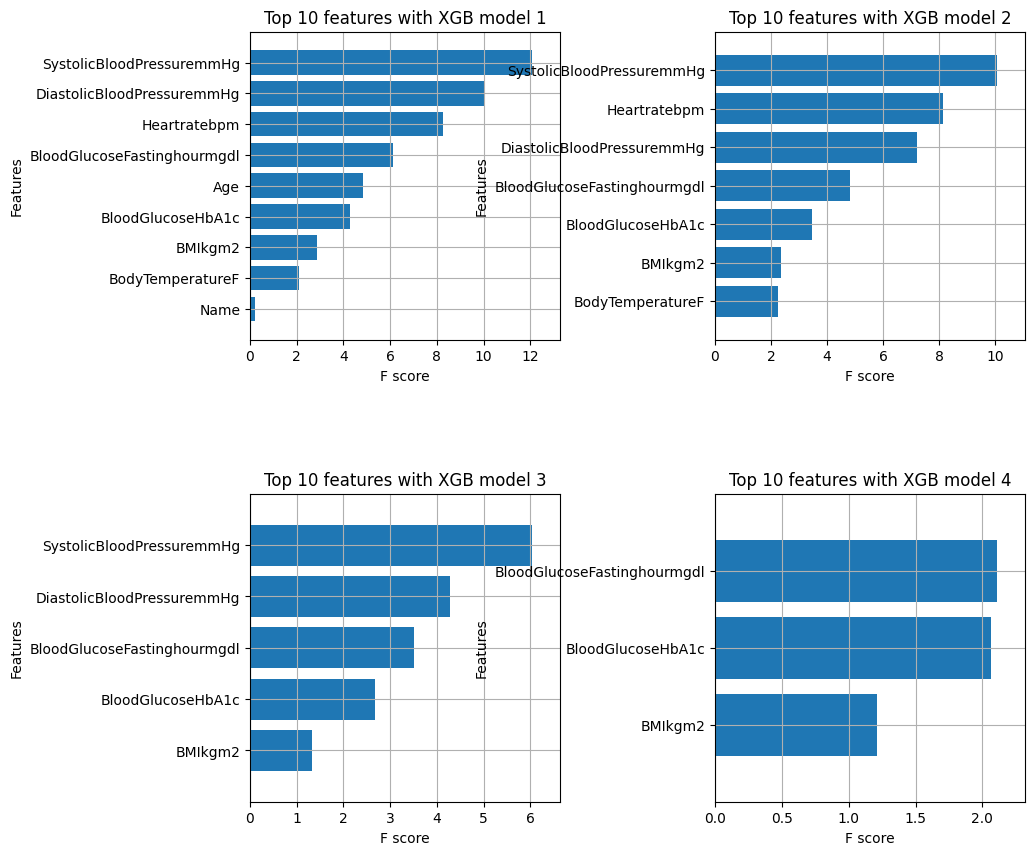

    Completed XGBoost feature selection in 1 seconds
    Alert: No ID variables ['PatientID'] are included in selected features
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 6 important features:
['Heartratebpm', 'SystolicBloodPressuremmHg', 'DiastolicBloodPressuremmHg', 'BMIkgm2', 'BloodGlucoseHbA1c', 'BloodGlucoseFastinghourmgdl']
Total Time taken for featurewiz selection = 6 seconds
Output contains a list of 6 important features and a train dataframe


In [22]:
target = 'Outcome'
 
features= featurewiz(df, target, corr_limit=0.7, verbose=2, sep=",",
header=0,test_data="", feature_engg="", category_encoders="")

In [23]:
print(features)


(['Heart rate(bpm)', 'Systolic Blood Pressure(mm Hg)', 'Diastolic Blood Pressure(mm Hg)', 'BMI(kg/m 2)', 'Blood Glucose(HbA1c)', 'Blood Glucose(Fasting hour-mg/dl)'],       Heart rate(bpm)  Systolic Blood Pressure(mm Hg)  \
0                  91                             161   
1                  99                              99   
2                  84                             129   
3                 135                             161   
4                  51                             106   
...               ...                             ...   
6098              101                             142   
6099               59                             129   
6100              145                             123   
6101              130                             152   
6102               84                             136   

      Diastolic Blood Pressure(mm Hg)  BMI(kg/m 2)  Blood Glucose(HbA1c)  \
0                                 100         24.9                    41

In [24]:
featuresinit=['Patient ID', 'Name', 'Age', 'BodyTemperatureF', 'Heartratebpm', 'SystolicBloodPressuremmHg', 'DiastolicBloodPressuremmHg', 'BMIkgm2', 'BloodGlucoseHbA1c', 'BloodGlucoseFastinghourmgdl']

In [25]:
featuresnewfromfeaturewiz=['Heartratebpm', 'SystolicBloodPressuremmHg', 'DiastolicBloodPressuremmHg', 'BMIkgm2', 'BloodGlucoseHbA1c', 'BloodGlucoseFastinghourmgdl']


In [30]:
#After Domain Expert Opinion, FeatureWIZ, FilterBased (Chi-Squared) and WrapperBased  Method = Selected Features. 
featuresfinal=['Patient ID','BodyTemperatureF','Heartratebpm', 'SystolicBloodPressuremmHg', 'DiastolicBloodPressuremmHg', 'BMIkgm2', 'BloodGlucoseHbA1c', 'BloodGlucoseFastinghourmgdl']

In [31]:
features_for_lime=featuresfinal

In [32]:
#df.head(5)
df_scaledstd.head(5)

,Patient ID,Name,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl),Outcome
0,-1.323792,-1.452532,-1.005533,-0.739852,0.216534,1.844258,1.635224,1.606215,0.703543,0.326150,-1.216567
1,-0.269710,0.035873,2.907025,-0.614160,0.570113,-1.753531,0.865249,0.308046,-0.432844,0.215684,-1.216567
2,-0.123129,0.398242,0.402988,-0.048543,-0.092849,-0.012665,-0.033055,-1.129213,0.930820,0.988948,1.222963
3,-0.186123,-0.699046,-0.066519,0.517074,2.161222,1.844258,1.763554,1.049857,1.839930,-1.109913,-1.216567
4,-0.194603,1.574592,1.811509,2.402463,-1.551365,-1.347329,0.480262,-1.221939,0.021711,-1.330846,-1.216567


In [33]:
#df.head(5)
df_scaledstd.head(5)

,Patient ID,Name,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl),Outcome
0,-1.323792,-1.452532,-1.005533,-0.739852,0.216534,1.844258,1.635224,1.606215,0.703543,0.326150,-1.216567
1,-0.269710,0.035873,2.907025,-0.614160,0.570113,-1.753531,0.865249,0.308046,-0.432844,0.215684,-1.216567
2,-0.123129,0.398242,0.402988,-0.048543,-0.092849,-0.012665,-0.033055,-1.129213,0.930820,0.988948,1.222963
3,-0.186123,-0.699046,-0.066519,0.517074,2.161222,1.844258,1.763554,1.049857,1.839930,-1.109913,-1.216567
4,-0.194603,1.574592,1.811509,2.402463,-1.551365,-1.347329,0.480262,-1.221939,0.021711,-1.330846,-1.216567


In [34]:
#df_new=df_scaledstd.drop('ID', axis=1)
df_new=df_scaledstd.drop(columns=['Name', 'Age'])


In [35]:
df_new.head(5)

,Patient ID,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl),Outcome
0,-1.323792,-0.739852,0.216534,1.844258,1.635224,1.606215,0.703543,0.326150,-1.216567
1,-0.269710,-0.614160,0.570113,-1.753531,0.865249,0.308046,-0.432844,0.215684,-1.216567
2,-0.123129,-0.048543,-0.092849,-0.012665,-0.033055,-1.129213,0.930820,0.988948,1.222963
3,-0.186123,0.517074,2.161222,1.844258,1.763554,1.049857,1.839930,-1.109913,-1.216567
4,-0.194603,2.402463,-1.551365,-1.347329,0.480262,-1.221939,0.021711,-1.330846,-1.216567


In [36]:
dfnew=df_new
#dfnew.info()
df['Outcome'].unique()

array([0, 2, 1])

In [37]:
X = dfnew.drop( 'Outcome', axis=1)
y = df['Outcome']


In [38]:
X.shape



(6103, 8)

In [39]:
y.shape

(6103,)

In [40]:
#Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.2, random_state = 0, stratify = y)

In [41]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.metrics import classification_report
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (4882, 8)
Number transactions y_train dataset:  (4882,)
Number transactions X_test dataset:  (1221, 8)
Number transactions y_test dataset:  (1221,)


In [42]:

# logistic regression object
lr = LogisticRegression()
  
# train the model on train set
lr.fit(X_train, y_train.ravel())
  
predictions = lr.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.61      0.50      0.54       412
           1       0.56      0.69      0.62       400
           2       0.50      0.47      0.49       409

    accuracy                           0.55      1221
   macro avg       0.55      0.55      0.55      1221
weighted avg       0.55      0.55      0.55      1221



In [43]:
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

mse= 0.9541359541359541
msle= 0.2844876701952015
mae= 0.6167076167076168
rmse= 0.9767988299214706


In [44]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train.ravel())
predictions = DT.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       412
           1       0.99      0.98      0.98       400
           2       0.98      0.99      0.98       409

    accuracy                           0.98      1221
   macro avg       0.98      0.98      0.98      1221
weighted avg       0.98      0.98      0.98      1221

mse= 0.03357903357903358
msle= 0.010222911127313217
mae= 0.022113022113022112
rmse= 0.18324582827184246


In [45]:
# support vector machine object
svm = SVC(kernel='linear')
  
# train the model on train set
svm.fit(X_train, y_train.ravel())
  
predictions = svm.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.75      0.35      0.48       412
           1       0.56      0.78      0.65       400
           2       0.53      0.61      0.57       409

    accuracy                           0.58      1221
   macro avg       0.61      0.58      0.57      1221
weighted avg       0.61      0.58      0.57      1221

mse= 0.8648648648648649
msle= 0.25830471141929817
mae= 0.5683865683865684
rmse= 0.9299811099505543


In [46]:
# support vector machine object rbf
svm = SVC(kernel='rbf')
  
# train the model on train set
svm.fit(X_train, y_train.ravel())
  
predictions = svm.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       412
           1       0.94      0.98      0.96       400
           2       0.89      0.91      0.90       409

    accuracy                           0.93      1221
   macro avg       0.93      0.93      0.93      1221
weighted avg       0.93      0.93      0.93      1221

mse= 0.20393120393120392
msle= 0.059633796709688054
mae= 0.11547911547911548
rmse= 0.4515874266752828


In [47]:
# KNN classifier machine object
KNN =  KNeighborsClassifier()
  
# train the model on train set
KNN.fit(X_train, y_train.ravel())
  
predictions = KNN.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90       412
           1       0.88      0.98      0.92       400
           2       0.86      0.85      0.86       409

    accuracy                           0.89      1221
   macro avg       0.90      0.89      0.89      1221
weighted avg       0.90      0.89      0.89      1221

mse= 0.26863226863226863
msle= 0.07722278480189881
mae= 0.16052416052416052
rmse= 0.5182974711806615


In [48]:
# KNN classifier machine object
KNN =  KNeighborsClassifier()
  
# train the model on train set
KNN.fit(X_train, y_train.ravel())
  
predictions = KNN.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90       412
           1       0.88      0.98      0.92       400
           2       0.86      0.85      0.86       409

    accuracy                           0.89      1221
   macro avg       0.90      0.89      0.89      1221
weighted avg       0.90      0.89      0.89      1221

mse= 0.26863226863226863
msle= 0.07722278480189881
mae= 0.16052416052416052
rmse= 0.5182974711806615


In [49]:
# GNB classifier machine object
GNB =  GaussianNB()
  
# train the model on train set
GNB.fit(X_train, y_train.ravel())
  
predictions = GNB.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.80      0.72      0.76       412
           1       0.90      0.95      0.92       400
           2       0.70      0.73      0.71       409

    accuracy                           0.80      1221
   macro avg       0.80      0.80      0.80      1221
weighted avg       0.80      0.80      0.80      1221

mse= 0.6486486486486487
msle= 0.19059364815499813
mae= 0.35053235053235055
rmse= 0.8053872662568292


In [50]:
# XGB classifier machine object
XGB = XGBClassifier()
  
# train the model on train set
XGB.fit(X_train, y_train.ravel())
  
predictions = XGB.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       412
           1       0.99      1.00      0.99       400
           2       0.99      0.99      0.99       409

    accuracy                           0.99      1221
   macro avg       0.99      0.99      0.99      1221
weighted avg       0.99      0.99      0.99      1221

mse= 0.021294021294021293
msle= 0.0065268711773112265
mae= 0.013104013104013105
rmse= 0.14592471104655746


In [51]:
# MLP classifier machine object
MLP = MLPClassifier(random_state=1, max_iter=300)
# train the model on train set
MLP.fit(X_train, y_train.ravel())
  
predictions = MLP.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       412
           1       0.96      0.97      0.97       400
           2       0.92      0.94      0.93       409

    accuracy                           0.95      1221
   macro avg       0.95      0.95      0.95      1221
weighted avg       0.95      0.95      0.95      1221

mse= 0.14742014742014742
msle= 0.04288584895989922
mae= 0.08517608517608517
rmse= 0.3839533141153328


In [52]:
# adaboost classifier machine object
adaboost =AdaBoostClassifier(random_state=96)
# train the model on train set
adaboost.fit(X_train, y_train.ravel())
  
predictions = adaboost.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.94      0.80      0.87       412
           1       0.98      0.98      0.98       400
           2       0.82      0.94      0.87       409

    accuracy                           0.91      1221
   macro avg       0.91      0.91      0.91      1221
weighted avg       0.91      0.91      0.91      1221

mse= 0.33742833742833744
msle= 0.10079159014153262
mae= 0.17526617526617527
rmse= 0.5808858213352581


In [53]:
# random Forest classifier machine object
RF =RandomForestClassifier(max_depth=2, random_state=0)
# train the model on train set
RF.fit(X_train, y_train.ravel())
  
predictions = RF.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       412
           1       0.73      0.99      0.84       400
           2       0.90      0.55      0.68       409

    accuracy                           0.76      1221
   macro avg       0.78      0.76      0.75      1221
weighted avg       0.78      0.76      0.75      1221

mse= 0.5741195741195741
msle= 0.176990698148244
mae= 0.3497133497133497
rmse= 0.7577067863755571


In [54]:
print("Before OverSampling, counts of label '2': {} ".format(sum(y_train == 2)))
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

print('Before OverSampling, the shape of train_X: {}'.format(X.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(y.shape))





Before OverSampling, counts of label '2': 1634 
Before OverSampling, counts of label '1': 1601
Before OverSampling, counts of label '0': 1647 

Before OverSampling, the shape of train_X: (6103, 8)
Before OverSampling, the shape of train_y: (6103,) 



In [55]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
# import SMOTE module from imblearn library

from imblearn.over_sampling import SMOTE
sm_over = SMOTE(random_state = 2)

X_train_res, y_train_res = sm_over.fit_resample(X_train, y_train.ravel())

In [57]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '2': {}".format(sum(y_train_res == 2)))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (4941, 8)
After OverSampling, the shape of train_y: (4941,) 

After OverSampling, counts of label '2': 1647
After OverSampling, counts of label '1': 1647
After OverSampling, counts of label '0': 1647


In [58]:
# apply near miss
from imblearn.under_sampling import NearMiss
nr = NearMiss()
  
X_train_miss, y_train_miss = nr.fit_resample(X_train, y_train.ravel())

In [59]:

lr1 = LogisticRegression()
lr1.fit(X_train_res, y_train_res.ravel())
predictions = lr1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.61      0.48      0.54       412
           1       0.56      0.71      0.63       400
           2       0.50      0.48      0.49       409

    accuracy                           0.56      1221
   macro avg       0.56      0.56      0.55      1221
weighted avg       0.56      0.56      0.55      1221

mse= 0.9475839475839476
msle= 0.2827017505912619
mae= 0.6117936117936118
rmse= 0.9734392367189375


In [62]:
#decision tree after 
DT1 = DecisionTreeClassifier()
DT1.fit(X_train_res, y_train_res.ravel())
predictions = DT1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       412
           1       0.98      0.97      0.98       400
           2       0.97      0.98      0.98       409

    accuracy                           0.98      1221
   macro avg       0.98      0.98      0.98      1221
weighted avg       0.98      0.98      0.98      1221

mse= 0.042588042588042586
msle= 0.012603831506760112
mae= 0.027846027846027847
rmse= 0.2063687054474166


In [63]:
# support vector machine object
svm1 = SVC(kernel='linear')
  
# train the model on train set
svm1.fit(X_train_res, y_train_res.ravel())
  
predictions = svm1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.75      0.35      0.48       412
           1       0.56      0.79      0.65       400
           2       0.53      0.60      0.56       409

    accuracy                           0.58      1221
   macro avg       0.61      0.58      0.56      1221
weighted avg       0.61      0.58      0.56      1221

mse= 0.8656838656838657
msle= 0.25824829198332616
mae= 0.5708435708435708
rmse= 0.9304213377195655


In [64]:
# support vector machine object
svm2 = SVC(kernel='rbf')
  
# train the model on train set
svm2.fit(X_train_res, y_train_res.ravel())
  
predictions = svm1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.75      0.35      0.48       412
           1       0.56      0.79      0.65       400
           2       0.53      0.60      0.56       409

    accuracy                           0.58      1221
   macro avg       0.61      0.58      0.56      1221
weighted avg       0.61      0.58      0.56      1221

mse= 0.8656838656838657
msle= 0.25824829198332616
mae= 0.5708435708435708
rmse= 0.9304213377195655


In [65]:
# KNN classifier machine object
KNN1 =  KNeighborsClassifier()
  
# train the model on train set
KNN1.fit(X_train_res, y_train_res.ravel())
  
predictions = KNN1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90       412
           1       0.88      0.98      0.92       400
           2       0.86      0.85      0.86       409

    accuracy                           0.89      1221
   macro avg       0.90      0.89      0.89      1221
weighted avg       0.90      0.89      0.89      1221

mse= 0.26863226863226863
msle= 0.07722278480189881
mae= 0.16052416052416052
rmse= 0.5182974711806615


In [66]:
# GNB classifier machine object
GNB1 =  GaussianNB()
  
# train the model on train set
GNB1.fit(X_train_res, y_train_res.ravel())
  
predictions = GNB1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.80      0.72      0.76       412
           1       0.89      0.95      0.92       400
           2       0.70      0.72      0.71       409

    accuracy                           0.80      1221
   macro avg       0.80      0.80      0.80      1221
weighted avg       0.80      0.80      0.79      1221

mse= 0.6511056511056511
msle= 0.19099758415964965
mae= 0.35298935298935297
rmse= 0.8069111791923886


In [67]:
# XGB classifier machine object
XGB1 =XGBClassifier()
XGB1.fit(X_train_res, y_train_res.ravel())
predictions = XGB1.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       412
           1       0.99      1.00      0.99       400
           2       0.99      0.99      0.99       409

    accuracy                           0.99      1221
   macro avg       0.99      0.99      0.99      1221
weighted avg       0.99      0.99      0.99      1221

mse= 0.018018018018018018
msle= 0.005538378989913535
mae= 0.011466011466011465
rmse= 0.13423121104280486


In [68]:
# MLP classifier machine object
MLP1 = MLPClassifier(random_state=1, max_iter=300)
# train the model on train set
MLP1.fit(X_train_res, y_train_res.ravel())
  
predictions = MLP1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       412
           1       0.96      0.97      0.96       400
           2       0.91      0.93      0.92       409

    accuracy                           0.94      1221
   macro avg       0.94      0.94      0.94      1221
weighted avg       0.94      0.94      0.94      1221

mse= 0.16461916461916462
msle= 0.04770410915476494
mae= 0.09418509418509419
rmse= 0.4057328734760897


In [69]:
# adaboost classifier machine object
adaboost1 =AdaBoostClassifier(random_state=96)
# train the model on train set
adaboost1.fit(X_train_res, y_train_res.ravel())
  
predictions = adaboost1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89       412
           1       0.98      0.98      0.98       400
           2       0.83      0.95      0.89       409

    accuracy                           0.92      1221
   macro avg       0.92      0.92      0.92      1221
weighted avg       0.92      0.92      0.92      1221

mse= 0.29238329238329236
msle= 0.08708734485284877
mae= 0.15315315315315314
rmse= 0.5407247843249765


In [70]:
# random Forest classifier machine object
RF1 =RandomForestClassifier(max_depth=2, random_state=0)
# train the model on train set
RF1.fit(X_train_res, y_train_res.ravel())
  
predictions = RF1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73       412
           1       0.75      0.99      0.85       400
           2       0.82      0.55      0.66       409

    accuracy                           0.76      1221
   macro avg       0.77      0.76      0.75      1221
weighted avg       0.77      0.76      0.75      1221

mse= 0.6363636363636364
msle= 0.19291246371413104
mae= 0.37428337428337427
rmse= 0.7977240352174656


In [71]:
#NEAR MISS RESULT 
print('After UnderSampling, the shape of train_X: {}'.format(X_train_miss.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_miss.shape))

print("After UnderSampling, counts of label '2': {}".format(sum(y_train_miss == 2)))
print("After UnderSampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After UnderSampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

After UnderSampling, the shape of train_X: (4803, 8)
After UnderSampling, the shape of train_y: (4803,) 

After UnderSampling, counts of label '2': 1601
After UnderSampling, counts of label '1': 1601
After UnderSampling, counts of label '0': 1601


In [72]:

lr1 = LogisticRegression()
lr1.fit(X_train_miss, y_train_miss.ravel())
predictions = lr1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.60      0.49      0.54       412
           1       0.56      0.70      0.62       400
           2       0.50      0.47      0.48       409

    accuracy                           0.55      1221
   macro avg       0.55      0.55      0.55      1221
weighted avg       0.55      0.55      0.55      1221

mse= 0.9647829647829648
msle= 0.2882965490171474
mae= 0.6208026208026208
rmse= 0.9822336609905836


In [73]:
#decision tree after 
DT1 = DecisionTreeClassifier()
DT1.fit(X_train_miss, y_train_miss.ravel())
predictions = DT1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       412
           1       0.99      0.98      0.99       400
           2       0.98      0.99      0.98       409

    accuracy                           0.99      1221
   macro avg       0.99      0.99      0.99      1221
weighted avg       0.99      0.99      0.99      1221

mse= 0.03194103194103194
msle= 0.00969477438053896
mae= 0.020475020475020474
rmse= 0.17872054146357083


In [74]:
# support vector machine object
svm1 = SVC(kernel='linear')
  
# train the model on train set
svm1.fit(X_train_miss, y_train_miss.ravel())
  
predictions = svm1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.75      0.38      0.51       412
           1       0.56      0.78      0.65       400
           2       0.54      0.60      0.57       409

    accuracy                           0.59      1221
   macro avg       0.62      0.59      0.58      1221
weighted avg       0.62      0.59      0.57      1221

mse= 0.8419328419328419
msle= 0.2511264200305077
mae= 0.556920556920557
rmse= 0.9175689848359315


In [75]:
# support vector machine object
svm1 = SVC(kernel='rbf')
  
# train the model on train set
svm1.fit(X_train_miss, y_train_miss.ravel())
  
predictions = svm1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       412
           1       0.94      0.98      0.96       400
           2       0.90      0.90      0.90       409

    accuracy                           0.92      1221
   macro avg       0.92      0.93      0.92      1221
weighted avg       0.92      0.92      0.92      1221

mse= 0.2203112203112203
msle= 0.06457625764667652
mae= 0.12366912366912367
rmse= 0.46937322070099


In [76]:
# KNN classifier machine object
KNN1 =  KNeighborsClassifier()
  
# train the model on train set
KNN1.fit(X_train_miss, y_train_miss.ravel())
  
predictions = KNN1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.94      0.85      0.90       412
           1       0.88      0.98      0.92       400
           2       0.86      0.84      0.85       409

    accuracy                           0.89      1221
   macro avg       0.89      0.89      0.89      1221
weighted avg       0.89      0.89      0.89      1221

mse= 0.2784602784602785
msle= 0.08018826136409188
mae= 0.16543816543816545
rmse= 0.5276933564678244


In [77]:
# GNB classifier machine object
GNB1 =  GaussianNB()
  
# train the model on train set
GNB1.fit(X_train_miss, y_train_miss.ravel())
  
predictions = GNB1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.79      0.74      0.76       412
           1       0.90      0.95      0.92       400
           2       0.71      0.72      0.71       409

    accuracy                           0.80      1221
   macro avg       0.80      0.80      0.80      1221
weighted avg       0.80      0.80      0.80      1221

mse= 0.6437346437346437
msle= 0.18933586529783278
mae= 0.34725634725634724
rmse= 0.8023307570663384


In [78]:
# XGB classifier machine object
XGB1 =XGBClassifier()
XGB1.fit(X_train_miss, y_train_miss.ravel())
predictions = XGB1.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       412
           1       0.99      1.00      0.99       400
           2       0.99      0.99      0.99       409

    accuracy                           0.99      1221
   macro avg       0.99      0.99      0.99      1221
weighted avg       0.99      0.99      0.99      1221

mse= 0.015561015561015561
msle= 0.004684532137399681
mae= 0.010647010647010647
rmse= 0.12474379968966619


In [79]:
# MLP classifier machine object
MLP1 = MLPClassifier(random_state=1, max_iter=300)
# train the model on train set
MLP1.fit(X_train_miss, y_train_miss.ravel())
  
predictions = MLP1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       412
           1       0.95      0.98      0.97       400
           2       0.92      0.90      0.91       409

    accuracy                           0.94      1221
   macro avg       0.94      0.94      0.94      1221
weighted avg       0.94      0.94      0.94      1221

mse= 0.18673218673218672
msle= 0.05448890913166494
mae= 0.10483210483210484
rmse= 0.43212519798339316


In [80]:
# adaboost classifier machine object
adaboost1 =AdaBoostClassifier(random_state=96)
# train the model on train set
adaboost1.fit(X_train_miss, y_train_miss.ravel())
  
predictions = adaboost1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.94      0.80      0.87       412
           1       0.98      0.98      0.98       400
           2       0.82      0.94      0.87       409

    accuracy                           0.91      1221
   macro avg       0.91      0.91      0.91      1221
weighted avg       0.91      0.91      0.91      1221

mse= 0.33742833742833744
msle= 0.10079159014153262
mae= 0.17526617526617527
rmse= 0.5808858213352581


In [81]:
# random Forest classifier machine object
RF1 =RandomForestClassifier(max_depth=2, random_state=0)
# train the model on train set
RF1.fit(X_train_miss, y_train_miss.ravel())
  
predictions = RF1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.73      0.76      0.74       412
           1       0.67      0.99      0.80       400
           2       0.90      0.44      0.59       409

    accuracy                           0.73      1221
   macro avg       0.77      0.73      0.71      1221
weighted avg       0.77      0.73      0.71      1221

mse= 0.597051597051597
msle= 0.17954659759370603
mae= 0.3808353808353808
rmse= 0.7726911394933923


In [82]:
print(features_for_lime)


['Patient ID', 'BodyTemperatureF', 'Heartratebpm', 'SystolicBloodPressuremmHg', 'DiastolicBloodPressuremmHg', 'BMIkgm2', 'BloodGlucoseHbA1c', 'BloodGlucoseFastinghourmgdl']


In [83]:
pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=8ce6fcd7d91846868c0ad9f5bf799e08663499f32ff758b506c26376a6dadba2
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [84]:
import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=features_for_lime,
    class_names=['0', '1', '2'],
    mode='classification'
)

In [85]:
exp = explainer.explain_instance(
    data_row=X_test[1], 
    predict_fn=lr1.predict_proba
)

exp.show_in_notebook(show_table=True)

In [86]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [87]:
import shap


In [88]:
explainer = shap.TreeExplainer(XGB1)
shap_values = explainer.shap_values(X)
expected_value = explainer.expected_value

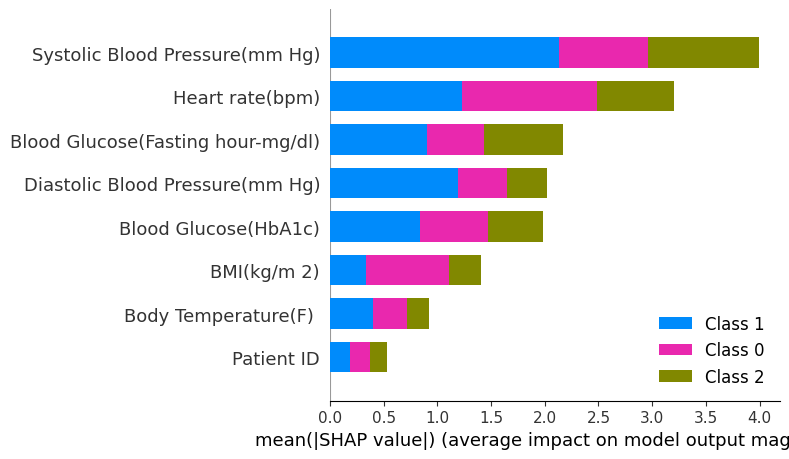

In [89]:
# Generate summary bar plot 
shap.summary_plot(shap_values, X,plot_type="bar") 

In [90]:
pip install explainerdashboard

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.9/286.9 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.6/220.6 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 78.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.5/91.5 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.5/136.5 kB 9.3 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.3.0
    Uninstalling Werkzeug-2.3.0:
      Successfully uninstalled Werkzeug-2.3.0


In [91]:
import explainerdashboard as expdb
from explainerdashboard import ClassifierExplainer, ExplainerDashboard
from explainerdashboard import InlineExplainer
from explainerdashboard.custom import (ImportancesComposite,
                                       IndividualPredictionsComposite,
                                       WhatIfComposite,
                                       ShapDependenceComposite,
                                       ShapInteractionsComposite,
                                       DecisionTreesComposite)

In [92]:
X_train = pd.DataFrame(X_train, columns = X.columns)

X_test = pd.DataFrame(X_test, columns=X.columns)

In [93]:
# Create the explainer object
explainer = ClassifierExplainer(XGB1, X_test, y_test,model_output='logodds')

Detected XGBClassifier model: Changing class type to XGBClassifierExplainer...
Generating self.shap_explainer = shap.TreeExplainer(model)


In [94]:

ie = InlineExplainer(explainer)

In [95]:
ie.shap.overview()


Calculating shap values...
Dash is running on http://127.0.0.1:8050/



INFO:dash.dash:Dash is running on http://127.0.0.1:8050/



<IPython.core.display.Javascript object>

In [96]:
# SHAP interactions
ie.shap.interaction_dependence()




Dash is running on http://127.0.0.1:8050/



INFO:dash.dash:Dash is running on http://127.0.0.1:8050/



<IPython.core.display.Javascript object>

In [97]:
# Model Stats
ie.classifier.model_stats()

Dash is running on http://127.0.0.1:8050/



INFO:dash.dash:Dash is running on http://127.0.0.1:8050/



<IPython.core.display.Javascript object>

In [98]:
# SHAP contribution
ie.shap.contributions_graph()

Dash is running on http://127.0.0.1:8050/



INFO:dash.dash:Dash is running on http://127.0.0.1:8050/



<IPython.core.display.Javascript object>

In [99]:
# SHAP dependence
ie.shap.dependence()

Dash is running on http://127.0.0.1:8050/



INFO:dash.dash:Dash is running on http://127.0.0.1:8050/



<IPython.core.display.Javascript object>